# Running the Classificaion using the tutorial 

# Thasina Tabashum- 11363551 
# MD Farhad Mokter- 11336535 

In [41]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.0


In [42]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [43]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [44]:
train_images.shape

(60000, 28, 28)

In [45]:
len(train_labels)

60000

In [46]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [47]:
test_images.shape

(10000, 28, 28)

In [48]:
len(test_labels)

10000

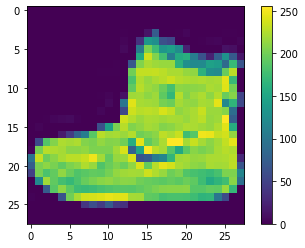

In [49]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

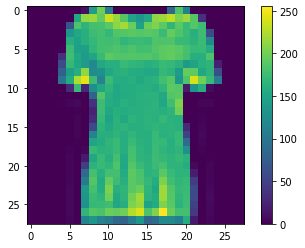

In [50]:
plt.figure()
plt.imshow(train_images[10])
plt.colorbar()
plt.grid(False)
plt.show()

In [51]:
train_images = train_images / 255.0

test_images = test_images / 255.0

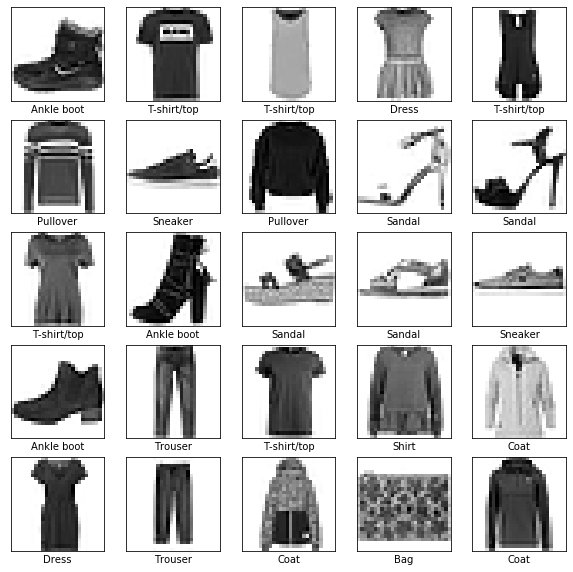

In [52]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [53]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [54]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [55]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 128us/sample - loss: 0.5010 - accuracy: 0.8239
Epoch 2/10
60000/60000 [==============================] - 8s 138us/sample - loss: 0.3792 - accuracy: 0.8641
Epoch 3/10
60000/60000 [==============================] - 8s 136us/sample - loss: 0.3389 - accuracy: 0.8758
Epoch 4/10
60000/60000 [==============================] - 8s 139us/sample - loss: 0.3137 - accuracy: 0.8852
Epoch 5/10
60000/60000 [==============================] - 8s 138us/sample - loss: 0.2967 - accuracy: 0.8908
Epoch 6/10
60000/60000 [==============================] - 8s 135us/sample - loss: 0.2796 - accuracy: 0.8965
Epoch 7/10
60000/60000 [==============================] - 8s 140us/sample - loss: 0.2686 - accuracy: 0.9000
Epoch 8/10
60000/60000 [==============================] - 8s 140us/sample - loss: 0.2579 - accuracy: 0.9031
Epoch 9/10
60000/60000 [==============================] - 8s 132us/sample - loss: 0.2482 - accuracy: 0.9072
Epoch

In [56]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 0s - loss: 0.3272 - accuracy: 0.8794

Test accuracy: 0.8794


In [57]:
predictions = model.predict(test_images)

In [58]:
predictions[0]

array([1.8492502e-06, 1.7117786e-11, 6.3056504e-11, 5.2088533e-12,
       1.0785264e-08, 9.9996885e-04, 1.7033905e-09, 1.6360734e-02,
       7.4862136e-08, 9.8263735e-01], dtype=float32)

In [59]:
np.argmax(predictions[0])

9

In [60]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

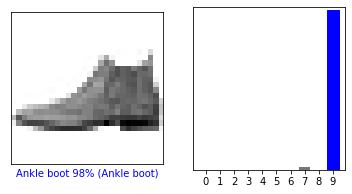

In [61]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

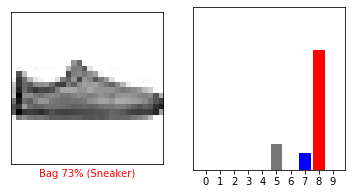

In [62]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

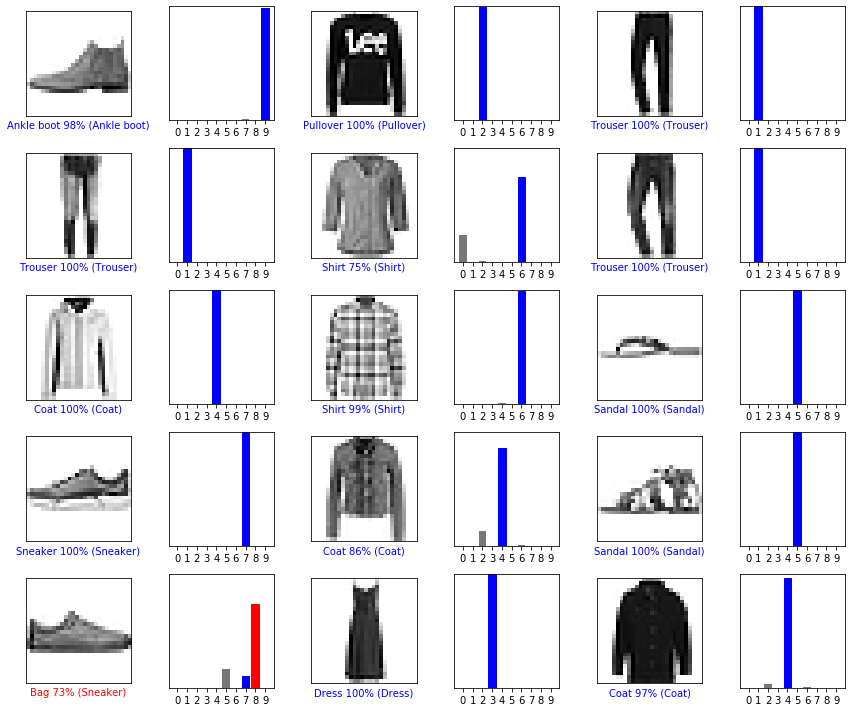

In [63]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [64]:
img = test_images[1]

print(img.shape)

(28, 28)


In [65]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [66]:
predictions_single = model.predict(img)

print(predictions_single)

[[1.59394083e-04 4.16449319e-10 9.98584032e-01 3.73524787e-11
  1.13609340e-03 2.50530902e-10 1.20460594e-04 1.66954641e-16
  3.67599036e-08 2.48801088e-12]]


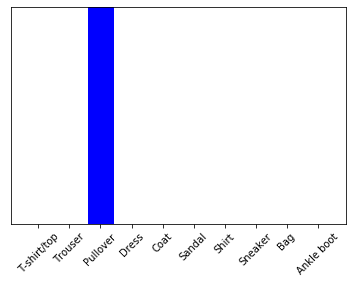

In [67]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [28]:
np.argmax(predictions_single[0])

2

# Confusion Matrix 

In [68]:
from sklearn.metrics import confusion_matrix
y_pred = np.argmax(predictions,axis=1)
confmat = confusion_matrix(y_true=test_labels, y_pred=y_pred)
print(confmat)

[[763   3  16  25   5   1 179   0   8   0]
 [  0 961   0  30   2   0   6   0   1   0]
 [ 11   1 752  16 156   0  63   0   1   0]
 [ 15   6   7 916  19   0  32   0   5   0]
 [  1   1  60  48 833   0  54   0   3   0]
 [  0   0   0   1   0 960   0  21   2  16]
 [ 68   0  93  32  84   0 712   0  11   0]
 [  0   0   0   0   0  14   0 963   2  21]
 [  3   0   5   3   3   2   7   3 974   0]
 [  0   0   0   1   0   7   1  31   0 960]]


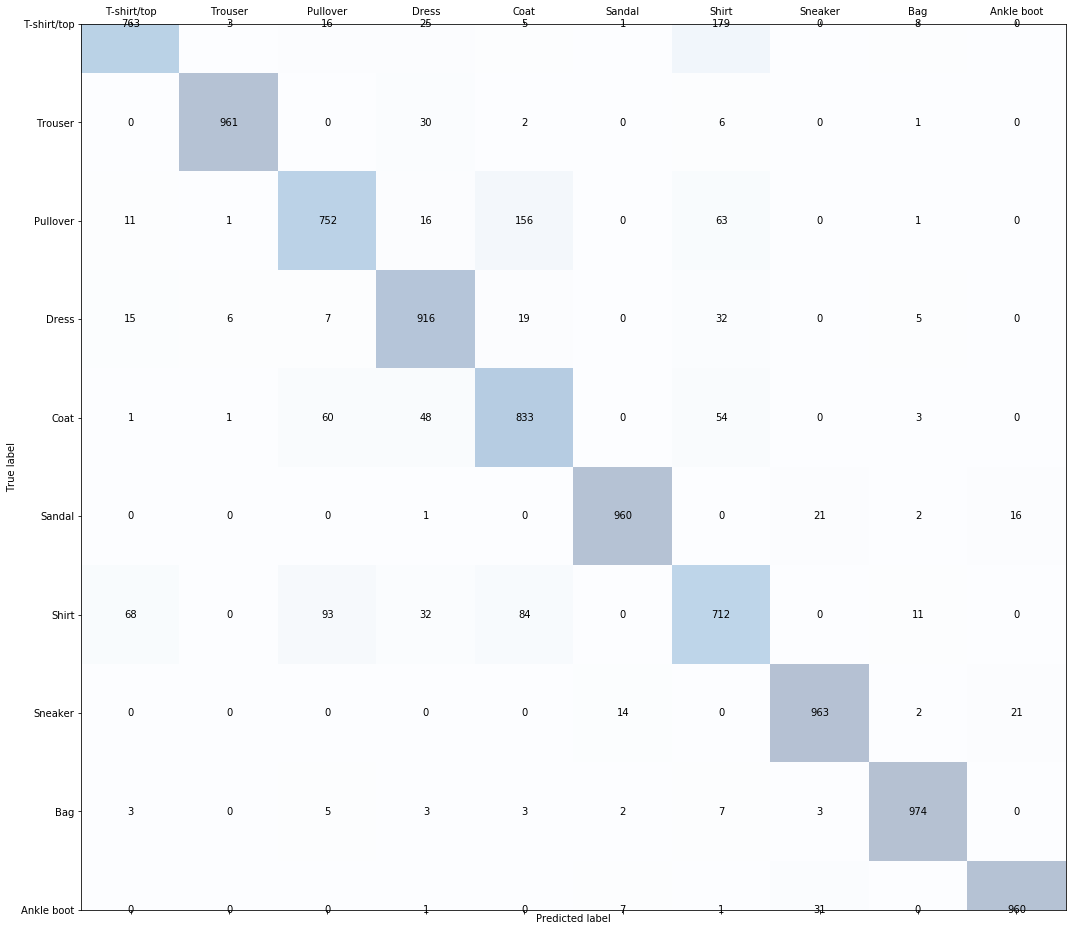

In [69]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks(np.arange(0,10,step=1), class_names)
plt.yticks(np.arange(0,10,step=1), class_names)
plt.tight_layout()

plt.show()


# Explanation of Mis-classification 

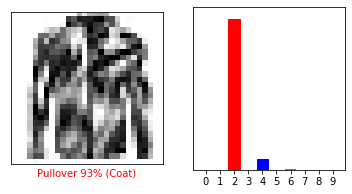

In [70]:
i = 17
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

In [71]:
print(test_labels[17])

4


from the confusion matrix we can see that 159 coats labels are predicted as Pullover. 
We have shown also in the sample 17 predicted as coat with 66% of confidence
Its because in the feature set we are considering 28*28 pixels. Coat and Pullover almost occupy same
pixels. So our model miss classify.
Same goes for shirt. 108 samples of shirt predicted as tshirt

#  Learning curve over training time

In [34]:
demo =model.fit(train_images, train_labels, validation_split=0.33, epochs=10, verbose=2)

Train on 40199 samples, validate on 19801 samples
Epoch 1/10
40199/40199 - 6s - loss: 0.1752 - accuracy: 0.9341 - val_loss: 0.1807 - val_accuracy: 0.9328
Epoch 2/10
40199/40199 - 6s - loss: 0.1702 - accuracy: 0.9352 - val_loss: 0.1875 - val_accuracy: 0.9295
Epoch 3/10
40199/40199 - 4s - loss: 0.1655 - accuracy: 0.9369 - val_loss: 0.1877 - val_accuracy: 0.9292
Epoch 4/10
40199/40199 - 5s - loss: 0.1602 - accuracy: 0.9387 - val_loss: 0.1851 - val_accuracy: 0.9305
Epoch 5/10
40199/40199 - 5s - loss: 0.1556 - accuracy: 0.9411 - val_loss: 0.1893 - val_accuracy: 0.9304
Epoch 6/10
40199/40199 - 6s - loss: 0.1508 - accuracy: 0.9430 - val_loss: 0.2155 - val_accuracy: 0.9189
Epoch 7/10
40199/40199 - 6s - loss: 0.1495 - accuracy: 0.9433 - val_loss: 0.1931 - val_accuracy: 0.9286
Epoch 8/10
40199/40199 - 4s - loss: 0.1433 - accuracy: 0.9464 - val_loss: 0.2005 - val_accuracy: 0.9259
Epoch 9/10
40199/40199 - 6s - loss: 0.1389 - accuracy: 0.9479 - val_loss: 0.2058 - val_accuracy: 0.9248
Epoch 10/10
40

In [35]:
print(demo.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


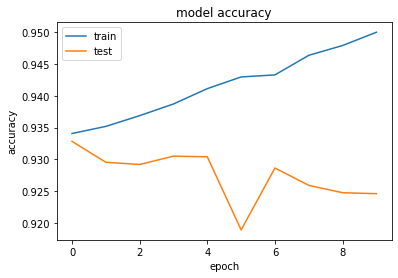

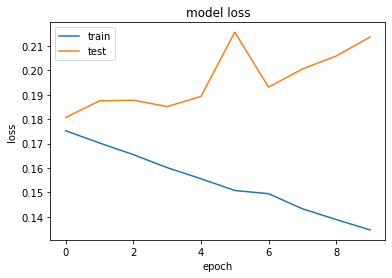

In [36]:
plt.plot(demo.history['accuracy'])
plt.plot(demo.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(demo.history['loss'])
plt.plot(demo.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [80]:
import numpy as np
accu  =[]
test_acc = []
data_size = []
for i in np.linspace(0.083,1,num=12):
    if(i==1):break
    demo2 =model.fit(train_images, train_labels, validation_split=1-i, epochs=2, verbose=2)
    data_size.append(round(len(train_images)*i))
    accu.append(np.mean(demo2.history['accuracy']))
    test_acc.append(np.mean(demo2.history['val_accuracy']))

Train on 4979 samples, validate on 55021 samples
Epoch 1/2
4979/4979 - 4s - loss: 0.0510 - accuracy: 0.9843 - val_loss: 0.0998 - val_accuracy: 0.9661
Epoch 2/2
4979/4979 - 5s - loss: 0.0323 - accuracy: 0.9902 - val_loss: 0.0927 - val_accuracy: 0.9683
Train on 9981 samples, validate on 50019 samples
Epoch 1/2
9981/9981 - 5s - loss: 0.0351 - accuracy: 0.9892 - val_loss: 0.0997 - val_accuracy: 0.9661
Epoch 2/2
9981/9981 - 5s - loss: 0.0347 - accuracy: 0.9895 - val_loss: 0.1038 - val_accuracy: 0.9654
Train on 14983 samples, validate on 45017 samples
Epoch 1/2
14983/14983 - 5s - loss: 0.0412 - accuracy: 0.9859 - val_loss: 0.1232 - val_accuracy: 0.9587
Epoch 2/2
14983/14983 - 5s - loss: 0.0383 - accuracy: 0.9866 - val_loss: 0.1346 - val_accuracy: 0.9559
Train on 19985 samples, validate on 40015 samples
Epoch 1/2
19985/19985 - 5s - loss: 0.0455 - accuracy: 0.9837 - val_loss: 0.1379 - val_accuracy: 0.9552
Epoch 2/2
19985/19985 - 5s - loss: 0.0428 - accuracy: 0.9842 - val_loss: 0.1487 - val_acc

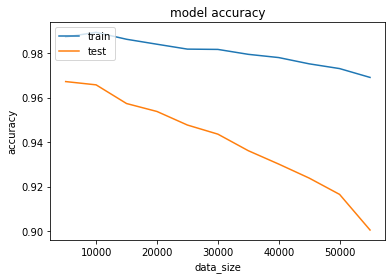

In [87]:
plt.plot(data_size,accu)
plt.plot(data_size,test_acc)

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('data_size')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [84]:
print(accu)
print(data_size)

[0.98724645, 0.9893297, 0.98621774, 0.98398805, 0.98179054, 0.98165995, 0.9794513, 0.9779956, 0.9751856, 0.97304785, 0.9690807]
[4980.0, 9982.0, 14984.0, 19985.0, 24987.0, 29989.0, 34991.0, 39993.0, 44995.0, 49996.0, 54998.0]


In [2]:
import os
os.environ['PATH'].split(';')

['C:\\Users\\tt0342\\AppData\\Local\\Continuum\\anaconda3',
 'C:\\Users\\tt0342\\AppData\\Local\\Continuum\\anaconda3\\Library\\mingw-w64\\bin',
 'C:\\Users\\tt0342\\AppData\\Local\\Continuum\\anaconda3\\Library\\usr\\bin',
 'C:\\Users\\tt0342\\AppData\\Local\\Continuum\\anaconda3\\Library\\bin',
 'C:\\Users\\tt0342\\AppData\\Local\\Continuum\\anaconda3\\Scripts',
 'C:\\Program Files (x86)\\Common Files\\Oracle\\Java\\javapath',
 'C:\\WINDOWS\\system32',
 'C:\\WINDOWS',
 'C:\\WINDOWS\\System32\\Wbem',
 'C:\\WINDOWS\\System32\\WindowsPowerShell\\v1.0\\',
 'C:\\WINDOWS\\System32\\OpenSSH\\',
 'C:\\Program Files\\PuTTY\\',
 'C:\\Program Files\\McAfee\\Agent',
 'C:\\Program Files\\Java\\jdk-13.0.1\\bin',
 'C:\\Users\\tt0342\\AppData\\Local\\Continuum\\anaconda3',
 'C:\\Users\\tt0342\\AppData\\Local\\Continuum\\anaconda3\\Library\\mingw-w64\\bin',
 'C:\\Users\\tt0342\\AppData\\Local\\Continuum\\anaconda3\\Library\\usr\\bin',
 'C:\\Users\\tt0342\\AppData\\Local\\Continuum\\anaconda3\\Library